## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 93us/step - loss: 2.2766 - accuracy: 0.1545 - val_loss: 2.2284 - val_accuracy: 0.1969
Epoch 2/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.1966 - accuracy: 0.2166 - val_loss: 2.1710 - val_accuracy: 0.2254
Epoch 3/500
50000/50000 [==============================] - 4s 90us/step - loss: 2.1443 - accuracy: 0.2365 - val_loss: 2.1252 - val_accuracy: 0.2362
Epoch 4/500
50000/50000 [==============================] - 4s 88us/step - loss: 2.1024 - accuracy: 0.2515 - val_loss: 2.0873 - val_accuracy: 0.2457
Epoch 5/500
50000/50000 [==============================] - 4s 88us/step - loss: 2.0661 - accuracy: 0.2632 - val_loss: 2.0528 - val_accuracy: 0.2611
Epoch 6/500
50000/50000 [==============================] - 4s 88us/step - loss: 2.0341 - accuracy: 0.2756 - val_loss: 2.0232 - val_accuracy: 0.2763
Epoch 7/500
50000/50000 [==============================] - 5s 

50000/50000 [==============================] - 5s 92us/step - loss: 1.6696 - accuracy: 0.4148 - val_loss: 1.6761 - val_accuracy: 0.4147
Epoch 56/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.6665 - accuracy: 0.4163 - val_loss: 1.6718 - val_accuracy: 0.4177
Epoch 57/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6631 - accuracy: 0.4184 - val_loss: 1.6702 - val_accuracy: 0.4201
Epoch 58/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.6599 - accuracy: 0.4191 - val_loss: 1.6674 - val_accuracy: 0.4187
Epoch 59/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.6570 - accuracy: 0.4186 - val_loss: 1.6636 - val_accuracy: 0.4230
Epoch 60/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.6536 - accuracy: 0.4212 - val_loss: 1.6623 - val_accuracy: 0.4195
Epoch 61/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.6507 - accuracy: 0.4223 - val_loss: 

Epoch 110/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.5323 - accuracy: 0.4655 - val_loss: 1.5566 - val_accuracy: 0.4538
Epoch 111/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.5302 - accuracy: 0.4650 - val_loss: 1.5530 - val_accuracy: 0.4566
Epoch 112/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.5281 - accuracy: 0.4656 - val_loss: 1.5619 - val_accuracy: 0.4491
Epoch 113/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.5266 - accuracy: 0.4666 - val_loss: 1.5527 - val_accuracy: 0.4558
Epoch 114/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5240 - accuracy: 0.4682 - val_loss: 1.5492 - val_accuracy: 0.4539
Epoch 115/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5225 - accuracy: 0.4684 - val_loss: 1.5543 - val_accuracy: 0.4560
Epoch 116/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.5207 - accuracy

50000/50000 [==============================] - 5s 107us/step - loss: 1.4410 - accuracy: 0.4956 - val_loss: 1.4934 - val_accuracy: 0.4744
Epoch 165/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4397 - accuracy: 0.4968 - val_loss: 1.4918 - val_accuracy: 0.4750
Epoch 166/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4380 - accuracy: 0.4977 - val_loss: 1.4867 - val_accuracy: 0.4742
Epoch 167/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.4366 - accuracy: 0.4959 - val_loss: 1.4861 - val_accuracy: 0.4763
Epoch 168/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4351 - accuracy: 0.4988 - val_loss: 1.4875 - val_accuracy: 0.4748
Epoch 169/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.4337 - accuracy: 0.4988 - val_loss: 1.4869 - val_accuracy: 0.4769
Epoch 170/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4321 - accuracy: 0.4982 - va

50000/50000 [==============================] - 5s 97us/step - loss: 1.3643 - accuracy: 0.5227 - val_loss: 1.4543 - val_accuracy: 0.4811
Epoch 219/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.3626 - accuracy: 0.5234 - val_loss: 1.4367 - val_accuracy: 0.4903
Epoch 220/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3614 - accuracy: 0.5242 - val_loss: 1.4644 - val_accuracy: 0.4809
Epoch 221/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3604 - accuracy: 0.5246 - val_loss: 1.4492 - val_accuracy: 0.4860
Epoch 222/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.3586 - accuracy: 0.5242 - val_loss: 1.4443 - val_accuracy: 0.4844
Epoch 223/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3574 - accuracy: 0.5241 - val_loss: 1.4366 - val_accuracy: 0.4888
Epoch 224/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.3558 - accuracy: 0.5258 - val

50000/50000 [==============================] - 5s 100us/step - loss: 1.2948 - accuracy: 0.5478 - val_loss: 1.4106 - val_accuracy: 0.4957
Epoch 273/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2939 - accuracy: 0.5474 - val_loss: 1.4179 - val_accuracy: 0.5009
Epoch 274/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2921 - accuracy: 0.5485 - val_loss: 1.4211 - val_accuracy: 0.4932
Epoch 275/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2917 - accuracy: 0.5485 - val_loss: 1.4245 - val_accuracy: 0.4926
Epoch 276/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2905 - accuracy: 0.5481 - val_loss: 1.3992 - val_accuracy: 0.5053
Epoch 277/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2892 - accuracy: 0.5485 - val_loss: 1.4195 - val_accuracy: 0.4954
Epoch 278/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.2884 - accuracy: 0.5489 - va

50000/50000 [==============================] - 5s 100us/step - loss: 1.2326 - accuracy: 0.5681 - val_loss: 1.3771 - val_accuracy: 0.5114
Epoch 327/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2316 - accuracy: 0.5690 - val_loss: 1.3920 - val_accuracy: 0.5074
Epoch 328/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2303 - accuracy: 0.5692 - val_loss: 1.3721 - val_accuracy: 0.5106
Epoch 329/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2297 - accuracy: 0.5696 - val_loss: 1.3754 - val_accuracy: 0.5130
Epoch 330/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2285 - accuracy: 0.5717 - val_loss: 1.4000 - val_accuracy: 0.5047
Epoch 331/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2284 - accuracy: 0.5697 - val_loss: 1.4133 - val_accuracy: 0.5031
Epoch 332/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.2263 - accuracy: 0.5712 - va

50000/50000 [==============================] - 5s 97us/step - loss: 1.1746 - accuracy: 0.5906 - val_loss: 1.3576 - val_accuracy: 0.5191
Epoch 381/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1739 - accuracy: 0.5907 - val_loss: 1.3707 - val_accuracy: 0.5178
Epoch 382/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1710 - accuracy: 0.5905 - val_loss: 1.3640 - val_accuracy: 0.5167
Epoch 383/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1701 - accuracy: 0.5921 - val_loss: 1.3624 - val_accuracy: 0.5142
Epoch 384/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1699 - accuracy: 0.5907 - val_loss: 1.3604 - val_accuracy: 0.5185
Epoch 385/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1686 - accuracy: 0.5912 - val_loss: 1.3698 - val_accuracy: 0.5205
Epoch 386/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1673 - accuracy: 0.5924 - val_

50000/50000 [==============================] - 5s 105us/step - loss: 1.1175 - accuracy: 0.6080 - val_loss: 1.3778 - val_accuracy: 0.5168
Epoch 435/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1168 - accuracy: 0.6098 - val_loss: 1.3686 - val_accuracy: 0.5200
Epoch 436/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1157 - accuracy: 0.6088 - val_loss: 1.3646 - val_accuracy: 0.5152
Epoch 437/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1135 - accuracy: 0.6097 - val_loss: 1.3854 - val_accuracy: 0.5097
Epoch 438/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.1135 - accuracy: 0.6092 - val_loss: 1.3479 - val_accuracy: 0.5203
Epoch 439/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1132 - accuracy: 0.6111 - val_loss: 1.3621 - val_accuracy: 0.5178
Epoch 440/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1126 - accuracy: 0.6117

50000/50000 [==============================] - 5s 99us/step - loss: 1.0623 - accuracy: 0.6286 - val_loss: 1.3375 - val_accuracy: 0.5309
Epoch 489/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.0646 - accuracy: 0.6276 - val_loss: 1.3486 - val_accuracy: 0.5279
Epoch 490/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.0643 - accuracy: 0.6283 - val_loss: 1.3732 - val_accuracy: 0.5155
Epoch 491/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.0597 - accuracy: 0.6281 - val_loss: 1.3654 - val_accuracy: 0.5173
Epoch 492/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0617 - accuracy: 0.6290 - val_loss: 1.4103 - val_accuracy: 0.5074
Epoch 493/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.0576 - accuracy: 0.6300 - val_loss: 1.3575 - val_accuracy: 0.5308
Epoch 494/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.0569 - accuracy: 0.6284 - 

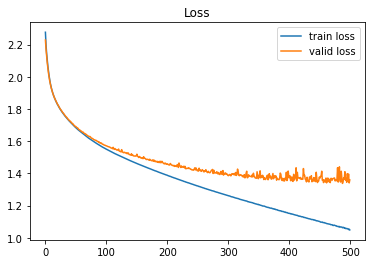

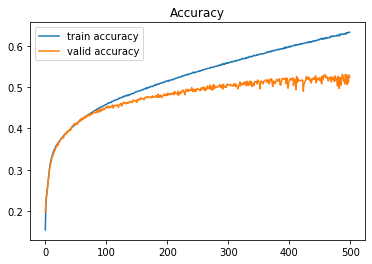

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()